In [1]:
from bankruptcy_prediction.dataset_methods import load_data
from bankruptcy_prediction.Model import Model
from bankruptcy_prediction.default_hyperparameters import DEFAULT_PARAMS_MAPPING
from sklearn.model_selection import train_test_split

In [2]:
raw_data_path = "../data/processed/dataset_correlation_reduced.csv"

In [3]:
df = load_data(raw_data_path)
# model = Model(algorithm="LightGBM", **DEFAULT_PARAMS_MAPPING["LightGBM"])
model = Model(algorithm="XGBoost")

In [4]:
X = df.drop(columns=['Bankrupt'])
y = df['Bankrupt']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
model.fit(X_train, y_train , )

C:\Users\jqbpo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:14:31] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [10]:
model.tune_hyperparameters(X_train, y_train, optimization_method="grid", n_iter=10 , scoring="recall")

C:\Users\jqbpo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jqbpo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jqbpo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\jqbpo\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:23:55] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" 

Algorithm: XGBoost
Hyperparameters:
  colsample_bytree: 0.6
  learning_rate: 0.1
  max_depth: 5
  n_estimators: 50
  subsample: 0.6
Accuracy: 0.9677
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.71      0.24      0.35        51

    accuracy                           0.97      1364
   macro avg       0.84      0.62      0.67      1364
weighted avg       0.96      0.97      0.96      1364

Confusion Matrix:
[[1308    5]
 [  39   12]]


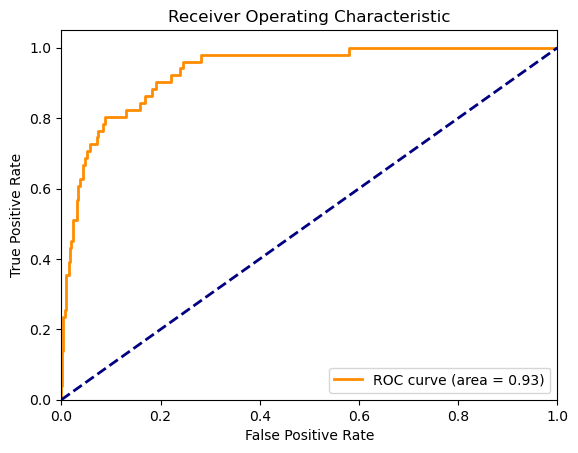

In [9]:
model.evaluate(X_test, y_test)
model.print_results()
model.plot_roc_curve(X_test, y_test)
